# Install Library

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from collections import Counter
from joblib import Parallel, delayed
import time
%matplotlib inline

# Preprocessing

In [2]:
heart_df = pd.read_csv('cardio_train.csv', delimiter=";")
heart_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  age_by_year  70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [3]:
heart_df['age_by_year'] = (heart_df['age'] // 365)  

In [4]:
heart_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_by_year
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


In [6]:
heart_df.describe().round(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_by_year
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0
mean,49972.4,19468.9,1.3,164.4,74.2,128.8,96.6,1.4,1.2,0.1,0.1,0.8,0.5,52.8
std,28851.3,2467.3,0.5,8.2,14.4,154.0,188.5,0.7,0.6,0.3,0.2,0.4,0.5,6.8
min,0.0,10798.0,1.0,55.0,10.0,-150.0,-70.0,1.0,1.0,0.0,0.0,0.0,0.0,29.0
25%,25006.8,17664.0,1.0,159.0,65.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,48.0
50%,50001.5,19703.0,1.0,165.0,72.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,53.0
75%,74889.2,21327.0,2.0,170.0,82.0,140.0,90.0,2.0,1.0,0.0,0.0,1.0,1.0,58.0
max,99999.0,23713.0,2.0,250.0,200.0,16020.0,11000.0,3.0,3.0,1.0,1.0,1.0,1.0,64.0


In [10]:
heart_df_no_id = heart_df.drop(columns=['id'])
heart_df_no_id.describe().loc[['min', 'max', 'mean']].round(1)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_by_year
min,10798.0,1.0,55.0,10.0,-150.0,-70.0,1.0,1.0,0.0,0.0,0.0,0.0,29.0
max,23713.0,2.0,250.0,200.0,16020.0,11000.0,3.0,3.0,1.0,1.0,1.0,1.0,64.0
mean,19468.9,1.3,164.4,74.2,128.8,96.6,1.4,1.2,0.1,0.1,0.8,0.5,52.8


In [11]:
# Nếu bạn muốn tạo cột 'x0', ví dụ như gán giá trị mặc định 1
heart_df['x0'] = 1

In [12]:
# Chọn các cột cần thiết
heart_df = heart_df[['x0', 'age_by_year', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 
                     'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]

# Kiểm tra kết quả
heart_df.head()

,x0,age_by_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,1,51,1,165,64.0,130,70,3,1,0,0,0,1
3,1,48,2,169,82.0,150,100,1,1,0,0,1,1
4,1,47,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
heart_df.columns = ['x0', 'age_by_year', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 
                    'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

heart_df.head()

,x0,age_by_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,1,51,1,165,64.0,130,70,3,1,0,0,0,1
3,1,48,2,169,82.0,150,100,1,1,0,0,1,1
4,1,47,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
heart_df.to_csv('modified_cardio_train.csv', index=False)

In [9]:
# Splitting the DataFrame into training and test sets
heart_df_train, heart_df_test = train_test_split(heart_df, test_size=0.2, random_state=17)

# Show the number of records in each split
print(f"Training DataFrame has {len(heart_df_train)} rows")
print(f"Test DataFrame has {len(heart_df_test)} rows")

Training DataFrame has 56000 rows
Test DataFrame has 14000 rows


# Visualizations

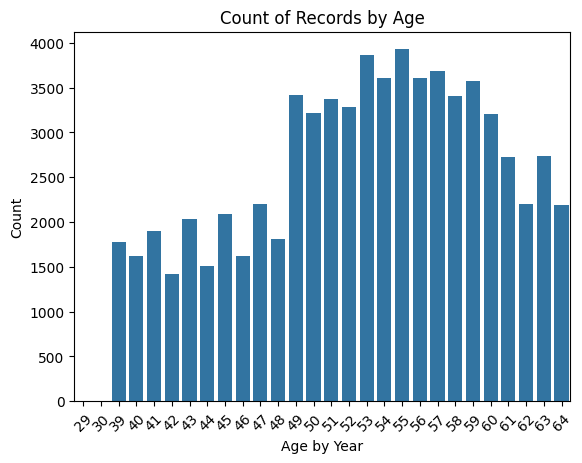

In [11]:
sns.countplot(x="age_by_year", data=heart_df)
plt.xlabel('Age by Year')
plt.ylabel('Count')
plt.title('Count of Records by Age')
plt.xticks(rotation=45)
plt.show()


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


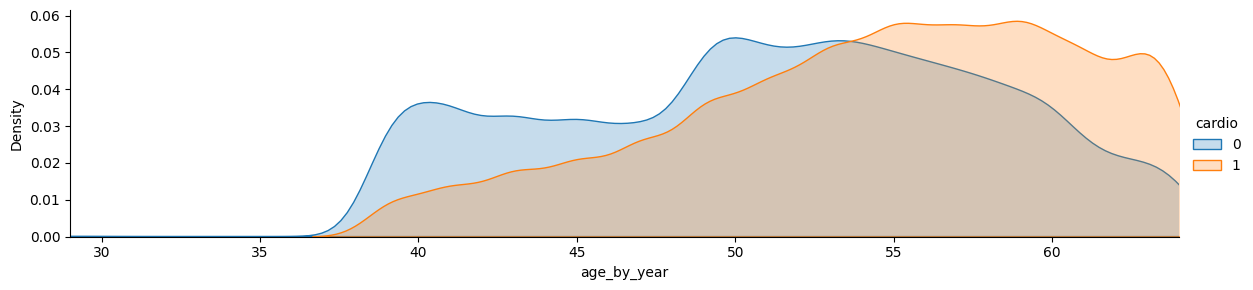

In [12]:
# Adjust column name if needed, assuming 'cardio' is the target column in heart_df
fig = sns.FacetGrid(heart_df, hue='cardio', aspect=4)
fig.map(sns.kdeplot, 'age_by_year', shade=True)

oldest = heart_df['age_by_year'].max()
youngest = heart_df['age_by_year'].min()

# Set the x-axis limits
fig.set(xlim=(youngest, oldest))

# Add legend for the 'cardio' categories
fig.add_legend()

# Show the plot
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7448\1355658674.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Male', 'Female'])


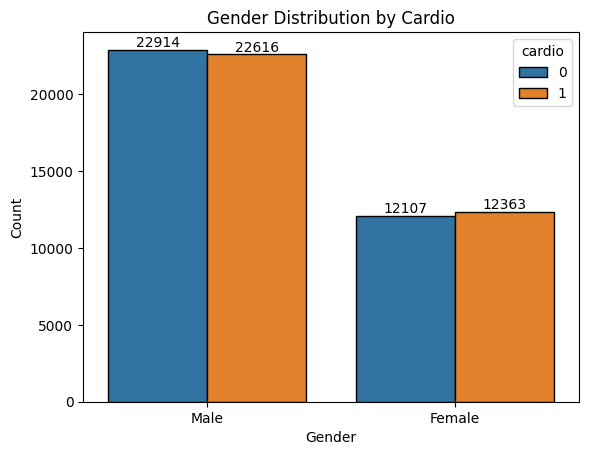

In [12]:
# Assuming heart_df is a Pandas DataFrame, you can directly access the columns
gender_cardio_data = heart_df[['gender', 'cardio']]

# Plot the countplot using seaborn
sns.countplot(x="gender", data=gender_cardio_data, hue="cardio", edgecolor='black')

# Get the axis to label the bars
ax = plt.gca()  # Get the current axes

# Label each bar with the count
for container in ax.containers:
    ax.bar_label(container)

# Set the x-tick labels for gender
ax.set_xticklabels(['Male', 'Female'])

# Show the plot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution by Cardio')
plt.show()


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


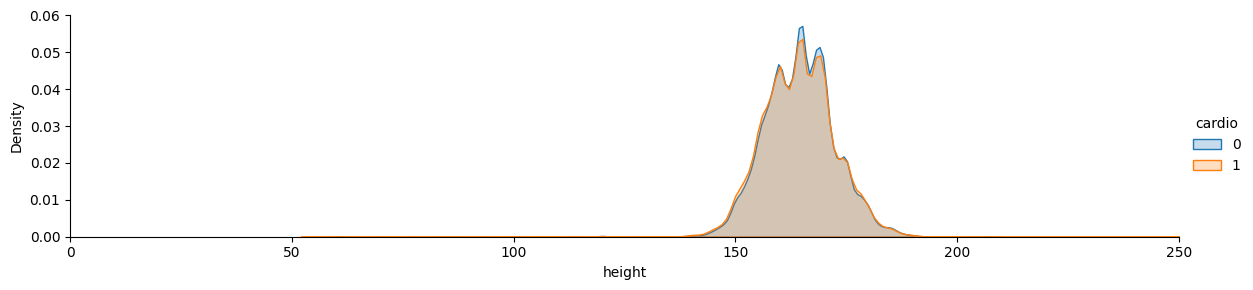

In [13]:
# Adjust column name if needed, assuming 'cardio' is the target column in heart_df
fig = sns.FacetGrid(heart_df, hue='cardio', aspect=4)
fig.map(sns.kdeplot, 'height', shade=True)

# Get the maximum value of age for setting the x-axis limit
oldest = heart_df['height'].max()

# Set the x-axis limits
fig.set(xlim=(0, oldest))

# Add legend for the 'cardio' categories
fig.add_legend()

# Show the plot
plt.show()


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


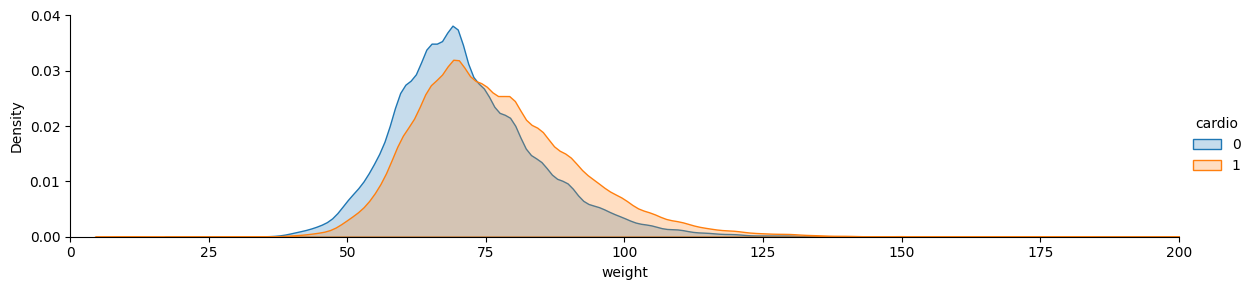

In [14]:
# Adjust column name if needed, assuming 'cardio' is the target column in heart_df
fig = sns.FacetGrid(heart_df, hue='cardio', aspect=4)
fig.map(sns.kdeplot, 'weight', shade=True)

# Get the maximum value of age for setting the x-axis limit
oldest = heart_df['weight'].max()

# Set the x-axis limits
fig.set(xlim=(0, oldest))

# Add legend for the 'cardio' categories
fig.add_legend()

# Show the plot
plt.show()


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


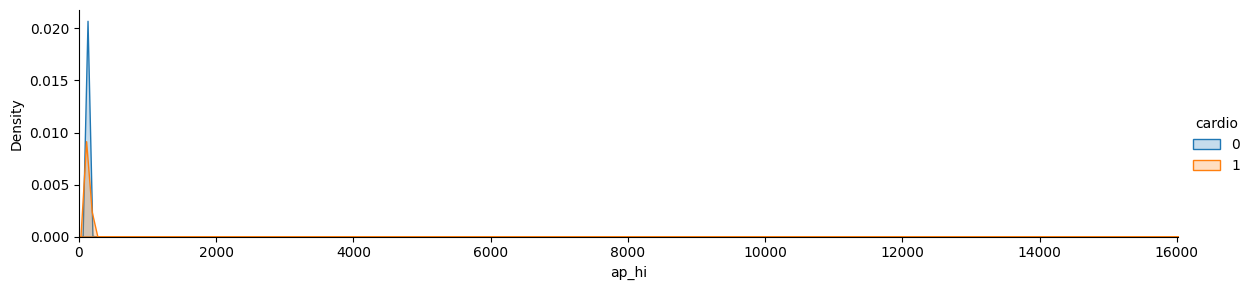

In [15]:
# Adjust column name if needed, assuming 'cardio' is the target column in heart_df
fig = sns.FacetGrid(heart_df, hue='cardio', aspect=4)
fig.map(sns.kdeplot, 'ap_hi', shade=True)

# Get the maximum value of age for setting the x-axis limit
oldest = heart_df['ap_hi'].max()

# Set the x-axis limits
fig.set(xlim=(0, oldest))

# Add legend for the 'cardio' categories
fig.add_legend()

# Show the plot
plt.show()


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


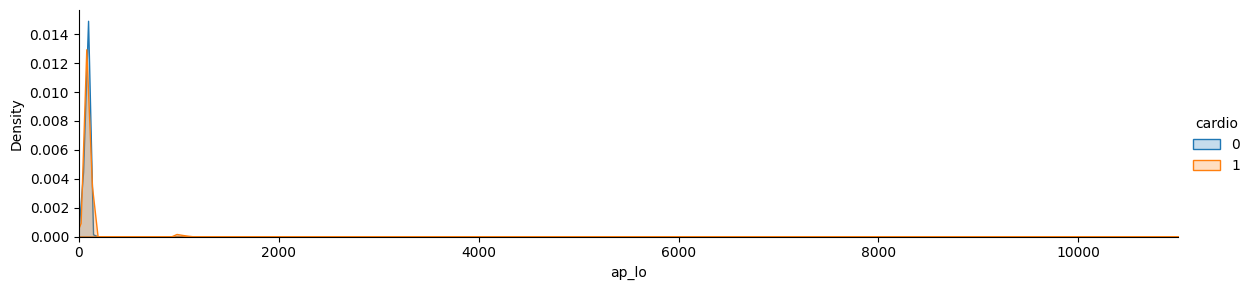

In [16]:
# Adjust column name if needed, assuming 'cardio' is the target column in heart_df
fig = sns.FacetGrid(heart_df, hue='cardio', aspect=4)
fig.map(sns.kdeplot, 'ap_lo', shade=True)

# Get the maximum value of age for setting the x-axis limit
oldest = heart_df['ap_lo'].max()

# Set the x-axis limits
fig.set(xlim=(0, oldest))

# Add legend for the 'cardio' categories
fig.add_legend()

# Show the plot
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7448\7356641.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['normal', 'above normal', 'well above normal'])


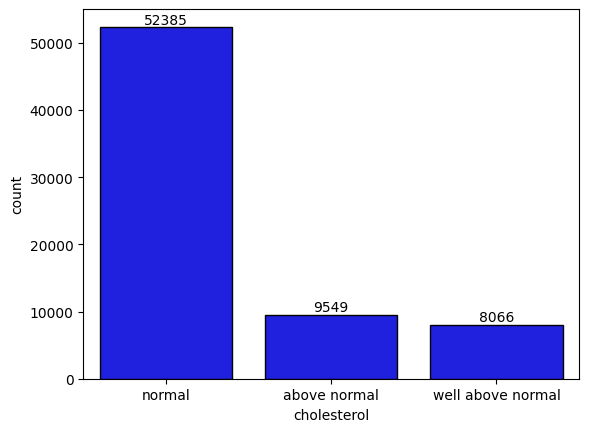

In [17]:
# Plotting a countplot for cholesterol
ax = sns.countplot(x=heart_df['cholesterol'], color='blue', edgecolor='black')

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Set the x-axis labels for the cholesterol categories
ax.set_xticklabels(['normal', 'above normal', 'well above normal'])

# Show the plot
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7448\3976237213.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['normal', 'above normal', 'well above normal'])


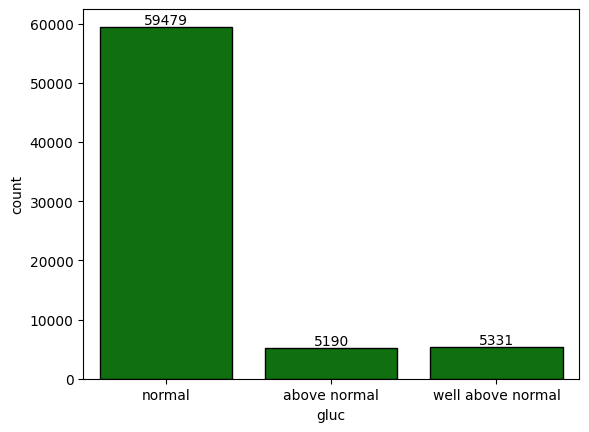

In [18]:
# Plotting a countplot for gluc
ax = sns.countplot(x=heart_df['gluc'], color='green', edgecolor='black')

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Set the x-axis labels for the cholesterol categories
ax.set_xticklabels(['normal', 'above normal', 'well above normal'])

# Show the plot
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7448\4100739916.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


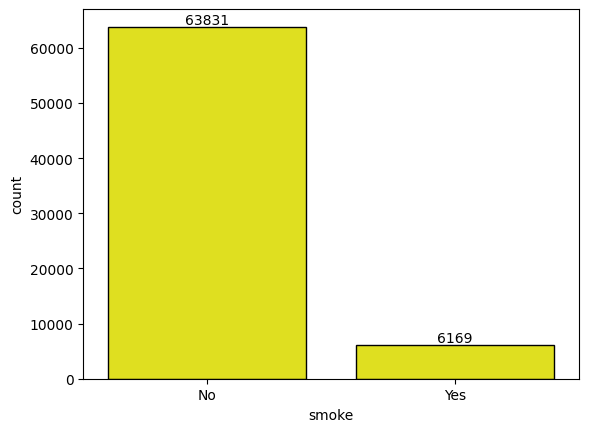

In [19]:
# Plotting a countplot for smoke
ax = sns.countplot(x=heart_df['smoke'], color='yellow', edgecolor='black')

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Set the x-axis labels for the cholesterol categories
ax.set_xticklabels(['No', 'Yes'])

# Show the plot
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7448\3258716498.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


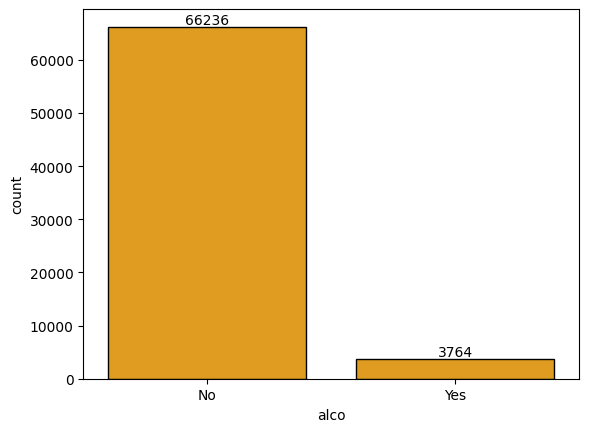

In [20]:
# Plotting a countplot for alco
ax = sns.countplot(x=heart_df['alco'], color='orange', edgecolor='black')

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Set the x-axis labels for the cholesterol categories
ax.set_xticklabels(['No', 'Yes'])

# Show the plot
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7448\3570657723.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


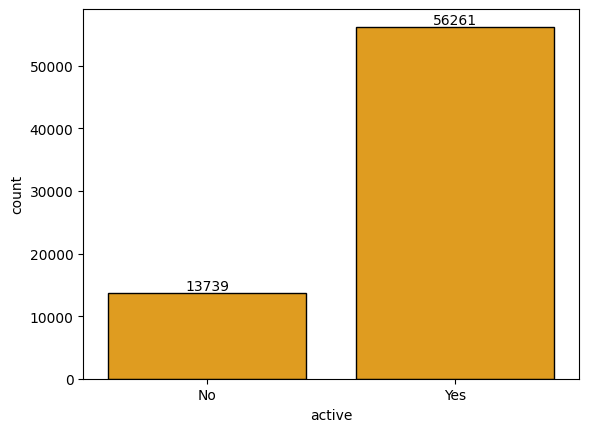

In [21]:
# Plotting a countplot for active
ax = sns.countplot(x=heart_df['active'], color='orange', edgecolor='black')

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Set the x-axis labels for the cholesterol categories
ax.set_xticklabels(['No', 'Yes'])

# Show the plot
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7448\3744624306.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


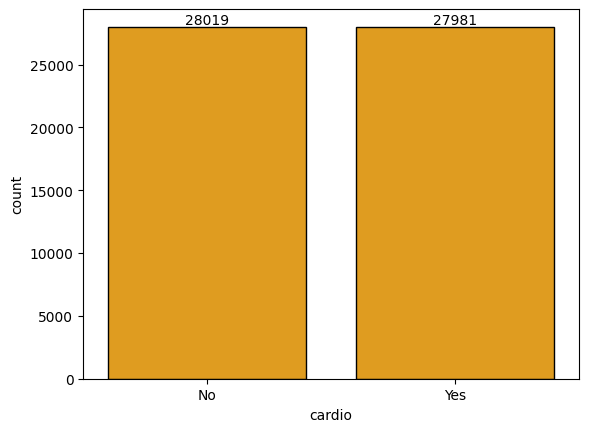

In [22]:
# Plotting a countplot for active
ax = sns.countplot(x=heart_df_train['cardio'], color='orange', edgecolor='black')

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Set the x-axis labels for the cholesterol categories
ax.set_xticklabels(['No', 'Yes'])

# Show the plot
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7448\2583377500.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


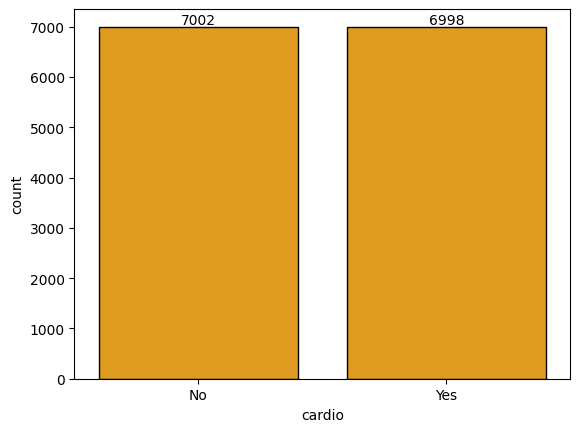

In [23]:
# Plotting a countplot for active
ax = sns.countplot(x=heart_df_test['cardio'], color='orange', edgecolor='black')

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Set the x-axis labels for the cholesterol categories
ax.set_xticklabels(['No', 'Yes'])

# Show the plot
plt.show()


# Training

## Prepare Data Before Training

In [24]:
# Select the target variable (cardio) using Pandas
y_training_data = heart_df_train['cardio']
y_test_data = heart_df_test['cardio']

# Drop the target variable (cardio) to keep only the features using Pandas
x_training_data = heart_df_train.drop(columns=['cardio'])
x_test_data = heart_df_test.drop(columns=['cardio'])


## Training by using RandomForestClassifier from Sklearn

In [25]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=17)
model.fit(x_training_data,y_training_data)
predictions = model.predict(x_test_data)
print(x_test_data.shape)

(14000, 12)


In [26]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.71      0.78      0.75      7002
           1       0.76      0.69      0.72      6998

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



In [27]:
# Compute confusion matrix
cm = confusion_matrix(y_test_data, predictions)
    
# Extract TP, FP, TN, FN
TN, FP, FN, TP = cm.ravel()
    
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

# Compute accuracy for verification
accuracy = (TP + TN) / (TP + FP + TN + FN)
print(f"Accuracy (calculated): {accuracy * 100:.2f}%")


True Positives (TP): 4807
False Positives (FP): 1541
True Negatives (TN): 5461
False Negatives (FN): 2191
Accuracy (calculated): 73.34%


In [28]:
# Compute confusion matrix
cm = confusion_matrix(y_test_data, predictions)

# Extract TP, FP, TN, FN for reference (optional)
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Compute metrics
accuracy = accuracy_score(y_test_data, predictions) * 100  # Multiply by 100 for percentage
precision = precision_score(y_test_data, predictions, average='binary') * 100
recall = recall_score(y_test_data, predictions, average='binary') * 100
f1 = f1_score(y_test_data, predictions, average='binary') * 100

# Print metrics
print(f'Accuracy: {accuracy:.2f}%')
print(f'Precision: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')
print(f'F1-score: {f1:.2f}%')

Accuracy: 73.34%
Precision: 75.72%
Recall: 68.69%
F1-score: 72.04%


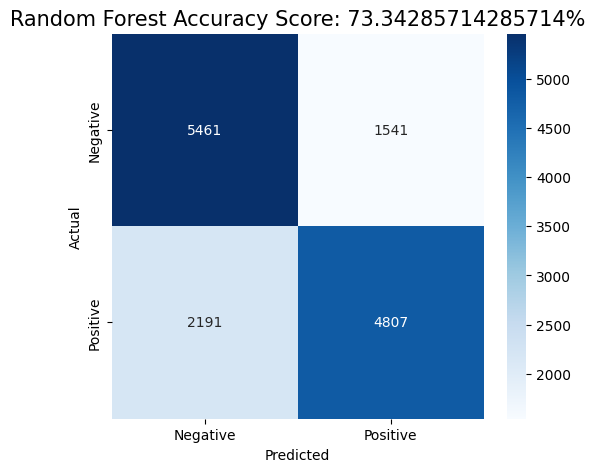

In [29]:
# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Title including accuracy
title = f'Random Forest Accuracy Score: {accuracy}%'
plt.title(title, size=15)

# Display the plot
plt.show()

## Training by using Custom Random Forest

### Custom Decision Tree

In [30]:
class CustomDecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y, depth=0):
        y = y.flatten()
        if len(set(y)) == 1 or len(y) < self.min_samples_split or (self.max_depth is not None and depth >= self.max_depth):
            return Counter(y).most_common(1)[0][0]
        best_split = self._best_split(X, y)
        if not best_split:
            return Counter(y).most_common(1)[0][0]
        left_tree = self.fit(X[best_split['left_indices']], y[best_split['left_indices']], depth + 1)
        right_tree = self.fit(X[best_split['right_indices']], y[best_split['right_indices']], depth + 1)
        return {'split': best_split, 'left': left_tree, 'right': right_tree}

    def predict(self, X):
        return np.array([self._predict_single(x, self.tree) for x in X])

    def _predict_single(self, x, tree):
        if isinstance(tree, dict):
            if x[tree['split']['feature_index']] <= tree['split']['threshold']:
                return self._predict_single(x, tree['left'])
            else:
                return self._predict_single(x, tree['right'])
        else:
            return tree

    def _best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None
        best_gini = 1.0 - sum((np.sum(y == c) / m) ** 2 for c in np.unique(y))
        best_split = None
        for feature_index in range(n):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] <= threshold
                right_indices = X[:, feature_index] > threshold
                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue
                gini_left = 1.0 - sum((np.sum(y[left_indices] == c) / len(y[left_indices])) ** 2 for c in np.unique(y))
                gini_right = 1.0 - sum((np.sum(y[right_indices] == c) / len(y[right_indices])) ** 2 for c in np.unique(y))
                gini = (len(y[left_indices]) * gini_left + len(y[right_indices]) * gini_right) / m
                if gini < best_gini:
                    best_gini = gini
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_indices': left_indices,
                        'right_indices': right_indices
                    }
        return best_split

### Custom Random Forest

In [31]:
class CustomRandomForest:
    def __init__(self, n_estimators=100, max_features=None, max_depth=None, min_samples_split=2, bootstrap=1.0, n_jobs=-1):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.bootstrap = bootstrap
        self.n_jobs = n_jobs
        self.trees = []

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).flatten()
        n_samples, n_features = X.shape
        n_bootstrap_samples = int(self.bootstrap * n_samples)
        self.trees = Parallel(n_jobs=self.n_jobs)(delayed(self._fit_tree)(X, y, n_bootstrap_samples, n_features) for _ in range(self.n_estimators))

    def _fit_tree(self, X, y, n_bootstrap_samples, n_features):
        indices = np.random.choice(range(len(X)), size=n_bootstrap_samples, replace=True)
        X_subset = X[indices]
        y_subset = y[indices]
        features = np.random.choice(n_features, size=self.max_features, replace=False) if self.max_features else range(n_features)
        tree = CustomDecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
        tree.tree = tree.fit(X_subset[:, features], y_subset)
        return (tree, features)

    def predict(self, X):
        X = np.array(X)
        tree_preds = Parallel(n_jobs=self.n_jobs)(delayed(self._predict_tree)(tree, features, X) for tree, features in self.trees)
        tree_preds = np.swapaxes(np.array(tree_preds), 0, 1)
        final_preds = [Counter(tree_preds[i]).most_common(1)[0][0] for i in range(tree_preds.shape[0])]
        return np.array(final_preds)

    def _predict_tree(self, tree, features, X):
        return tree.predict(X[:, features])


### Training

In [32]:
X_train = x_training_data.values
Y_train = y_training_data.values
X_test = x_test_data.values
Y_test = y_test_data.values

In [33]:
# Assuming X_train, Y_train, X_test, Y_test are numpy arrays
print(f"Training dataset shape: {X_train.shape}, {Y_train.shape}")
print(f"Test dataset shape: {X_test.shape}, {Y_test.shape}")

Training dataset shape: (56000, 12), (56000,)
Test dataset shape: (14000, 12), (14000,)


In [34]:
model2 = CustomRandomForest(n_estimators=100, max_features=5, max_depth=10)

In [35]:
# Measure the time to fit the model
start_time = time.time()
model2.fit(X_train, Y_train)
fit_time = time.time() - start_time
print(f"Time to fit the model: {fit_time:.2f} seconds")

Time to fit the model: 19.22 seconds


In [36]:
# Predictions
start_time = time.time()
predictions_custom = model2.predict(X_test)
predict_time = time.time() - start_time
print(f"Time to predict: {predict_time:.2f} seconds")

Time to predict: 133.75 seconds


### Evaluation

In [37]:
# Evaluation
print("Classification Report:")
print(classification_report(Y_test, predictions_custom))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      7002
           1       0.76      0.66      0.71      6998

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [38]:

# Compute confusion matrix
cm = confusion_matrix(y_test_data, predictions_custom)
    
# Extract TP, FP, TN, FN
TN, FP, FN, TP = cm.ravel()
    
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

# Compute accuracy for verification
accuracy = (TP + TN) / (TP + FP + TN + FN)
print(f"Accuracy (calculated): {accuracy * 100:.2f}%")


True Positives (TP): 4626
False Positives (FP): 1434
True Negatives (TN): 5568
False Negatives (FN): 2372
Accuracy (calculated): 72.81%


In [39]:
# Compute confusion matrix
cm = confusion_matrix(y_test_data, predictions_custom)

# Extract TP, FP, TN, FN for reference (optional)
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Compute metrics
accuracy = accuracy_score(y_test_data, predictions_custom) * 100  # Multiply by 100 for percentage
precision = precision_score(y_test_data, predictions_custom, average='binary') * 100
recall = recall_score(y_test_data, predictions_custom, average='binary') * 100
f1 = f1_score(y_test_data, predictions_custom, average='binary') * 100

# Print metrics
print(f'Accuracy: {accuracy:.2f}%')
print(f'Precision: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')
print(f'F1-score: {f1:.2f}%')

Accuracy: 72.81%
Precision: 76.34%
Recall: 66.10%
F1-score: 70.85%


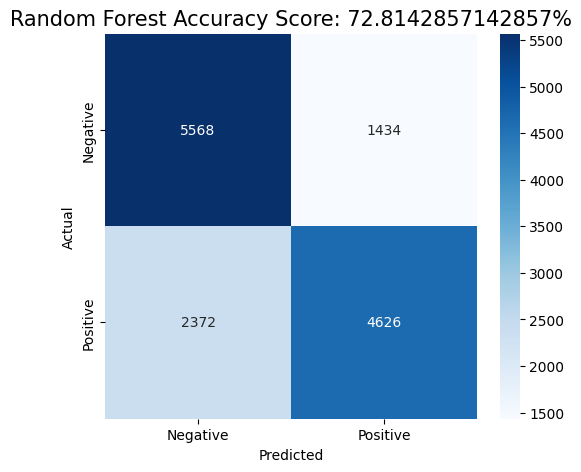

In [40]:
# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Title including accuracy
title = f'Random Forest Accuracy Score: {accuracy}%'
plt.title(title, size=15)

# Display the plot
plt.show()